# Lecture 24

In this lecture we covered how to analyze rare events sometimes using monte carlo methods.

## Rare events, like >= 4 sigma.

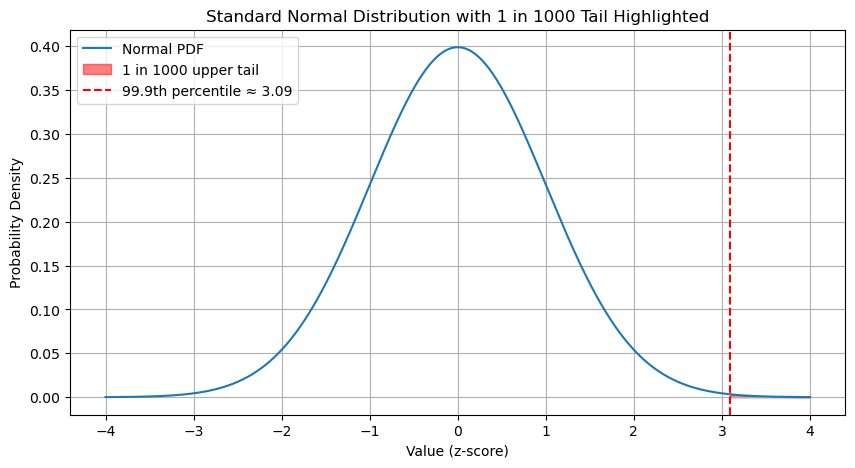

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0      # mean
sigma = 1   # standard deviation

# Define x range
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Calculate the threshold for 1-in-1000 in the upper tail
threshold = norm.ppf(0.999, mu, sigma)

# Plotting the Gaussian PDF
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Normal PDF')
plt.fill_between(x, y, where=(x > threshold), color='red', alpha=0.5, label='1 in 1000 upper tail')
plt.axvline(threshold, color='red', linestyle='--', label=f'99.9th percentile ≈ {threshold:.2f}')
plt.title('Standard Normal Distribution with 1 in 1000 Tail Highlighted')
plt.xlabel('Value (z-score)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## Parametric Monte Carlo Simulation

If we want to reason about the probability of events, but we either don't want to go through 
all the math, or we want to increase our confidence in an analysis, we often use 
computer simulations.  If we we using random sampling to estimate a numerical result then
we are said to be using a *Monte Carlo Method*.

Examples of Monte Carlo methods:
* boostrapping
* permutation tests

If we assume a distribution including assuming its parameters and then drawing samples from the
assumed distribution we are said to be using a *Parametric Monte Carlo Simulation.*

For example: 
* What is the probability that when rolling two fair six-sided dice, both land on 6 (i.e., a “double six”)?

We know the exact answer is

$$P(\textrm{six and six}) = \frac{1}{6}\cdot \frac{1}{6} = \frac{1}{36} \approx 0.02778$$

Let's say that we don't have high confidence in this result, so we want to run
a simulation to see if it gives us approximately the same answer.

We could assume that the dice are unbiased and independent and thus
the results obey a uniform discrete random variable $U{1, ..., 6}$.


In [3]:
import numpy as np
from numpy.random import randint
N = 10000
d1 = randint(1, 7, N)   # die 1
d2 = randint(1, 7, N)   # die 2.

two_six = np.sum(d1 * d2 == 36)/N
print(f"probabiity of rolling two sixes: {two_six:.4f}")


probabiity of rolling two sixes: 0.0272


## Binomial Monte Carlo Simulation: Zombivia

We have a fictional vaccine for the Zombivia disease.  We run a trial with 2000 participants.  
There are 1000 in the placebo group and 1000 in the exposed group.  

There are three severe adverse reactions in the trial.   Let the adverse reaction represent
a success in a Binomial R.V. with $n=1000$ trials.  Thus we estimate $p$ as

$$\hat{p} = \frac{k}{n} = \frac{3}{1000} = 0.3\%$$

Aside: For simplicity we only consider the exposed group for estimating the
rate of servere adverse reactions.  In a more realistic study, we would look at the
Benefit-Risk Ratio between which takes 
into account the benefit of the vaccine over the risks associated with the vaccine.
The benefit of the vaccine would take into account its effectiveness at mitigating
preventing the diseease or preventing the effects of the disease.

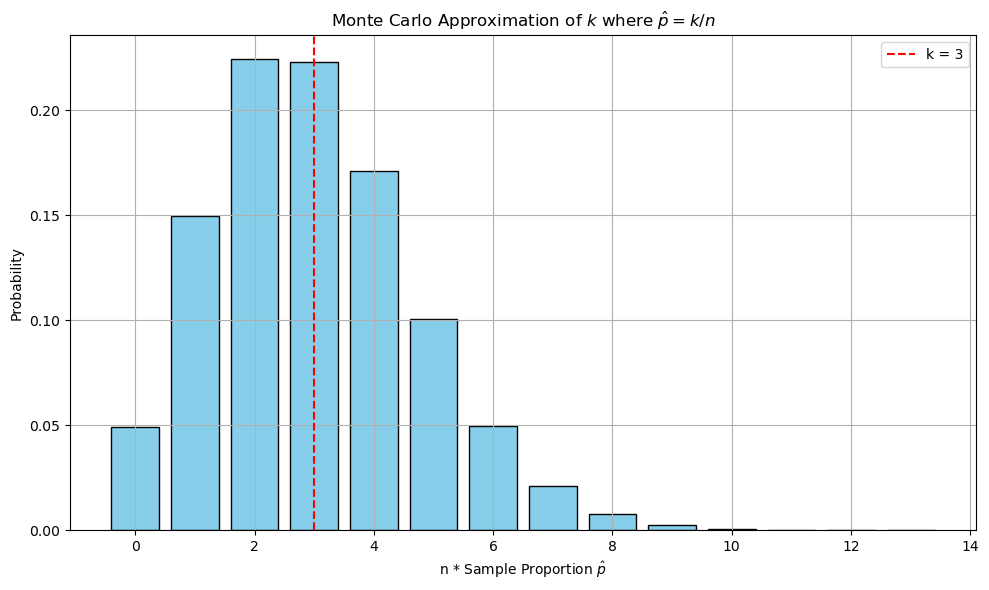

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the binomial distribution
n = 1000         # number of trials
k = 3
p = k / n     # true probability of success (~0.0015 or 0.15%)
num_simulations = 100000  # number of Monte Carlo draws

# Run the Monte Carlo simulation
ks = np.random.binomial(n, p, size=num_simulations)
#p_hats = ks / n  # sample proportions

unique, counts = np.unique(ks, return_counts=True)
probs = counts / num_simulations


# Plot the empirical sampling distribution
plt.figure(figsize=(10, 6))
plt.bar(unique, probs, color='skyblue', edgecolor='black')
plt.axvline(k, color='red', linestyle='--', label=f"k = {k}")
plt.title("Monte Carlo Approximation of $k$ where $\hat{{p}} = k/n$")
plt.xlabel("n * Sample Proportion $\hat{{p}}$")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Two-sided confidence interval.

This confidence interval has a problem.  It includes zero.   We know that the
sample proportion cannot be zero or else we would have no severe adverse effects.

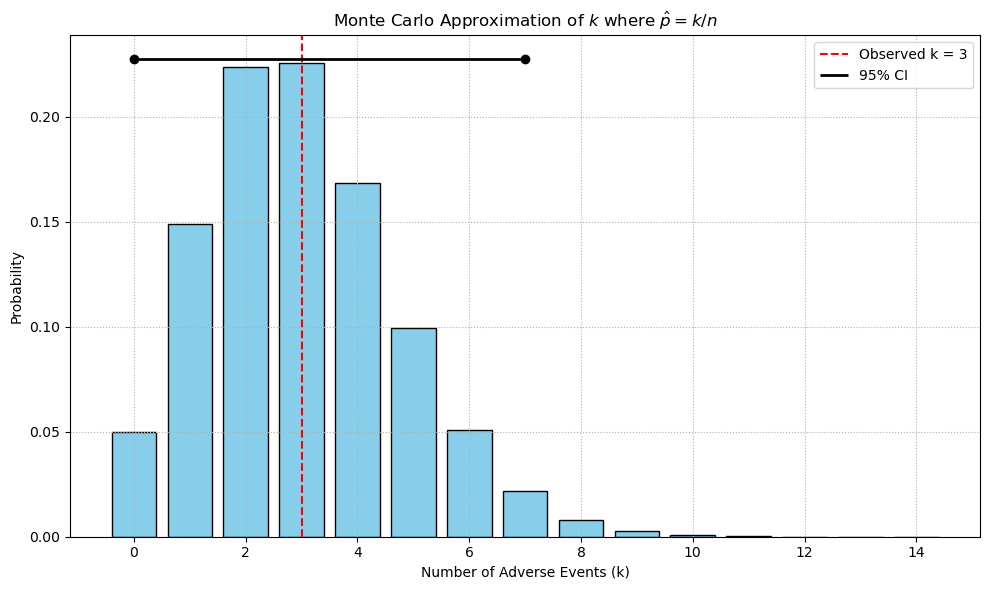

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 1000
k = 3
p = k / n
num_simulations = 100000

# Monte Carlo simulation
ks = np.random.binomial(n, p, size=num_simulations)
unique, counts = np.unique(ks, return_counts=True)
probs = counts / num_simulations

# Compute empirical 95% CI
ci_lower = np.percentile(ks, 2.5)
ci_upper = np.percentile(ks, 97.5)

# Plot the empirical PMF
plt.figure(figsize=(10, 6))
plt.bar(unique, probs, color='skyblue', edgecolor='black')
plt.axvline(k, color='red', linestyle='--', label=f"Observed k = {k}")

# Draw horizontal CI bar with whiskers manually
y_bar = max(probs) + 0.002
plt.hlines(y=y_bar, xmin=ci_lower, xmax=ci_upper, color='black', linewidth=2, label='95% CI')
plt.plot([ci_lower, ci_upper], [y_bar, y_bar], 'o', color='black')  # whisker ends

# Annotate
plt.title("Monte Carlo Approximation of $k$ where $\hat{p} = k/n$")
plt.xlabel("Number of Adverse Events (k)")
plt.ylabel("Probability")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

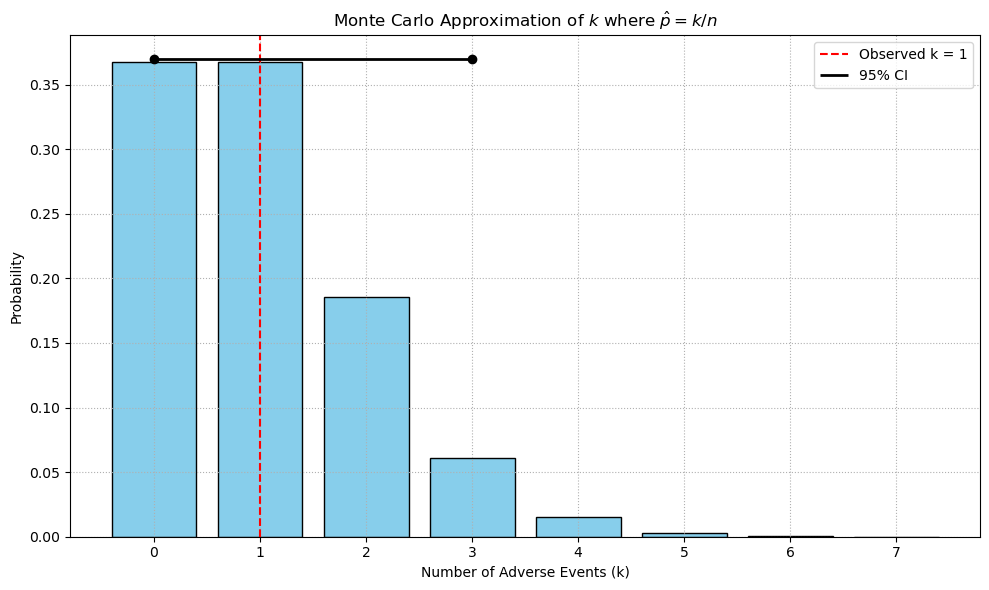

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 1000
k = 1
p = k / n
num_simulations = 100000

# Monte Carlo simulation
ks = np.random.binomial(n, p, size=num_simulations)
unique, counts = np.unique(ks, return_counts=True)
probs = counts / num_simulations

# Compute empirical 95% CI
ci_lower = np.percentile(ks, 2.5)
ci_upper = np.percentile(ks, 97.5)

# Plot the empirical PMF
plt.figure(figsize=(10, 6))
plt.bar(unique, probs, color='skyblue', edgecolor='black')
plt.axvline(k, color='red', linestyle='--', label=f"Observed k = {k}")

# Draw horizontal CI bar with whiskers manually
y_bar = max(probs) + 0.002
plt.hlines(y=y_bar, xmin=ci_lower, xmax=ci_upper, color='black', linewidth=2, label='95% CI')
plt.plot([ci_lower, ci_upper], [y_bar, y_bar], 'o', color='black')  # whisker ends

# Annotate
plt.title("Monte Carlo Approximation of $k$ where $\hat{p} = k/n$")
plt.xlabel("Number of Adverse Events (k)")
plt.ylabel("Probability")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
## Monte Carlo for one severe adverse events

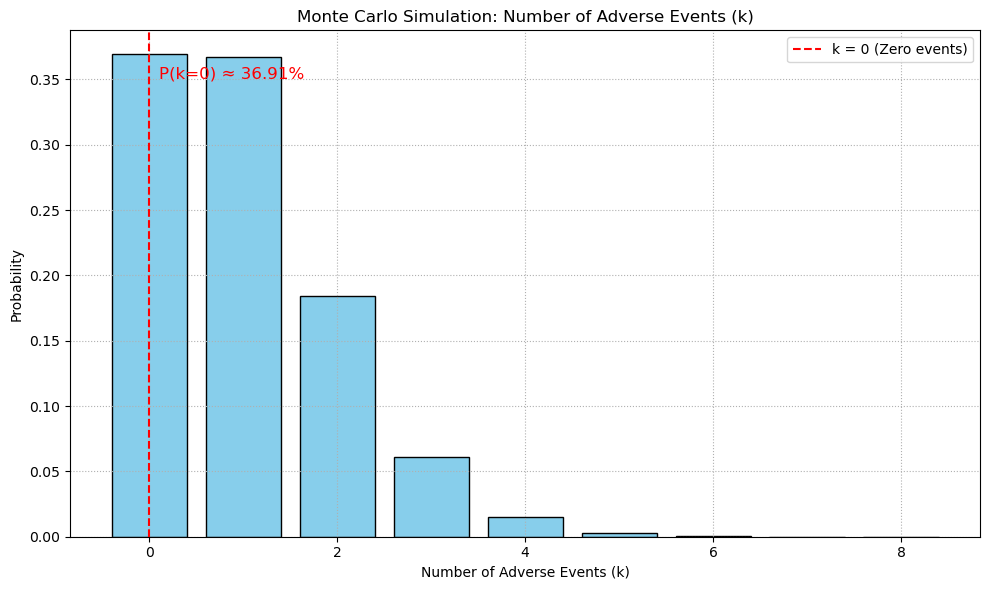

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
n = 1000              # number of participants in each trial
p = 0.001             # true underlying risk (0.1%)
simulations = 100000  # number of trials

# Simulate number of adverse events from Binomial(n, p)
ks = np.random.binomial(n=n, p=p, size=simulations)

# Count how often we observed 0 adverse events
prob_zero_events = np.mean(ks == 0)

# Build PMF from simulations
unique, counts = np.unique(ks, return_counts=True)
probs = counts / simulations

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique, probs, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='k = 0 (Zero events)')
plt.title("Monte Carlo Simulation: Number of Adverse Events (k)")
plt.xlabel("Number of Adverse Events (k)")
plt.ylabel("Probability")
plt.grid(True, linestyle=':')
plt.legend()

# Annotate zero-event probability
plt.text(0.1, max(probs) * 0.95, f"P(k=0) ≈ {prob_zero_events:.2%}", fontsize=12, color='red')

plt.tight_layout()
plt.show() 

In [ ]:
#pinf = 0.041
pinf = 0.5
phosp_unvac = 0.57
display(Math(r"P[\text{Hosp} | \text{unvac}]=" + f"{phosp_unvac}"))
display(Math(r"P[\text{inf}]=" + f"{pinf}"))
arr_hosp = pinf * phosp_unvac
display(Math(r"ARR_{hosp}=" + f"{arr_hosp:.2}"))

### Absolute Risk Increase

In the BNT162b2 Phase III trial (Polack et al., NEJM 2020):
 * Vaccine arm (N ≈ 21 720): 0.6 % SAEs → about 130 serious adverse events
 * Placebo arm (N ≈ 21 728): 0.5 % SAEs → about 109 serious adverse events  ￼


$$\text{ARI}_{SAE} = P(\text{SAE} | \text{vac}) - P(\text{SAE}| \text{placebo})$$


In [ ]:
display(Math(r"P(\text{SAE}| \text{vac}) = " + f"{phat}"))

In [ ]:
p_sae_placebo = 0.005
display(Math(r"P{(SAE} | \text{placebo}) = " + f"{p_sae_placebo}"))

In [ ]:
ari_sae = phat - p_sae_placebo
display(Math(r"ARI_{SAE} = P(SAE |\text{vac}) - P{(SAE} | \text{placebo}) =" + f"{ari_sae}"))

In [ ]:
BRR = arr_hosp / ari_sae
display(Math(r"\text{BRR} = \frac{" + f"{arr_hosp}" + r"}{" + f"{ari_sae}" + r"} = " + f"{BRR:.4}"))

In [ ]:
n = 1131
arr_hosp = 0.000064 * 0.5

# Use 3/n rule because zero SAEs reported related to the vaccine.
ari_sae = p_sae = 3 / 1131
display(Math(r"\text{ARI}_{sae} \approx P[\text{SAE}] = " + f"{p_sae:.3}"))

brr_hosp = arr_hosp / ari_sae

display(Math(r"\text{BRR}_{hosp} = \frac{\text{ARR}_{hosp}}{\text{ARI}_{sae}}=" + f"{brr_hosp}"))
display(Math(r"\text{BRR} =" + f"{brr_hosp}"))


### Benefit Risk with respect to mortality for young

$$\text{ARR}_{mort} = (P(\text{Mort from disease} | \text{unvac}) - P(\text{Mort} | \text{vac})) \cdot P(\text{inf})$$

As a strawman, we assume $P(\text{Mort from disease} | \text{vac}) = 0$.

$$\text{ARR}_{mort} = P(\text{Mort from disease} | \text{unvac}) \cdot 0.5 = IFR \cdot 0.5$$

From [https://link.springer.com/article/10.1007/s10654-020-00698-1】

Levin, A.T., Hanage, W.P., Owusu-Boaitey, N. et al. Assessing the age specificity
of infection fatality rates for COVID-19: systematic review, meta-analysis, and
public policy implications. Eur J Epidemiol 35, 1123–1138 (2020). 

$$\log_{10}(\text{IFR\%}) = -3.27 + 0.0524 \cdot age$$

$$\text{IFR\%} = 10^{-3.27 + 0.0524 \cdot age}$$

$$\text{IFR} = \text{IFR\%} / 100$$
$$\text{ARR}_{mort} \approx \text{IFR} \cdot 0.5$$

Let's use 10 years old.



In [248]:
# Infection Fatality Rate (expressed as a ratio rather than a percentage)
def ifr(age):
    return pow(10, -3.27 + 0.0524 * age)/100
    
display(Math(r"\text{IFR}=" + f"{ifr(10):.6f}" + r"\%"))
arr_mort = ifr(10) * pinf
brr_mort = arr_mort / ari_sae
#display(Math(f"{arr_mort:.5}"))
display(Math(r"\text{ARR}_{mort}= IFR / 100 \cdot 0.5 =" + f"{arr_mort:.8f}"))
display(Math(r"\text{ARI}_{sae} \approx P[\text{SAE}] = " + f"{p_sae:.3}"))

display(Math(r"BRR_{mort}= \frac{\text{ARR}_{mort}}{\text{ARI}_{sae}}=" + f"{brr_mort:.5f}"))
display(Math(r"BRR_{mort}=" + f"{brr_mort:.5f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

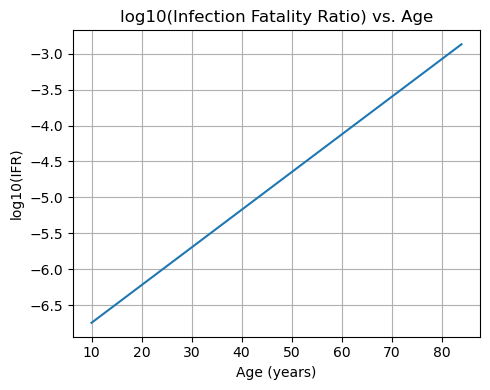

In [252]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import log
from numpy.lib.scimath import log

# Define the age range
ages = np.arange(10, 85)
log_ifrs = log(ifr(ages)/100)/ log(10)

# Create the plot
plt.figure(figsize=(5, 4))
plt.plot(ages, log_ifrs)
plt.xlabel('Age (years)')
plt.ylabel('log10(IFR)')
plt.title('log10(Infection Fatality Ratio) vs. Age')
plt.grid(True)
plt.tight_layout()
plt.show()

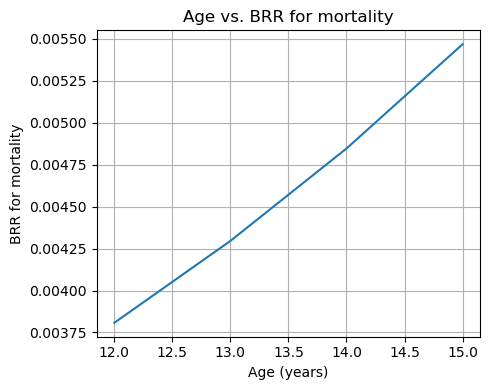

In [258]:
ages = np.arange(12, 16)

# steel man for pregnancy
pinf = 0.5    # probability of infection
arr_mort = ifr(ages) * pinf
brr_mort = arr_mort / ari_sae
p_sae = 3 / n
ari_sae = p_sae   # this wouldn't be true if there are adverse events in the placebo arm

plt.figure(figsize=(5, 4))
plt.plot(ages, brr_mort)
plt.xlabel('Age (years)')
plt.ylabel('BRR for mortality')
plt.title('Age vs. BRR for mortality')
plt.grid(True)
plt.tight_layout()
plt.show()

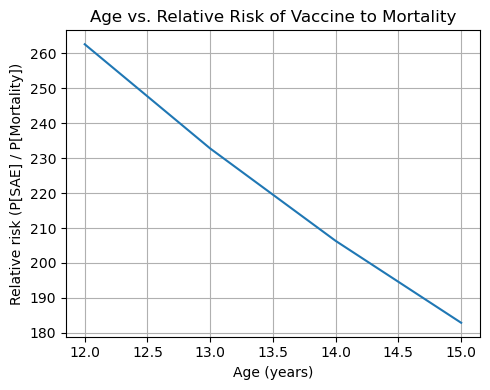

In [257]:
# Steel man relative risk of vaccine to the disease
rr_mort = p_sae / (ifr(ages) * pinf)

plt.figure(figsize=(5, 4))
plt.plot(ages, rr_mort)
plt.xlabel('Age (years)')
plt.ylabel('Relative risk (P[SAE] / P[Mortality])')
plt.title('Age vs. Relative Risk of Vaccine to Mortality')
plt.grid(True)
plt.tight_layout()
plt.show()

In [266]:
ages = np.arange(15, 45)

n_exposed = 6   # we don't know the ages. 

# steel man for pregnancy
pinf = 0.5       # steel man assumption for probability of infection
p_sae = 3 / n_exposed
ari_sae = p_sae   # this wouldn't be true if there are adverse events in the placebo arm

# arr_hosp = (P(hosp | unvac)  - P(hosp | vac)) * P(Inf)
# P(hosp | vac) = 0    # steel man assumption
# arr_hosp = P(hosp | unvac) * P(inf)
p_hosp_unvac = .315
arr_hosp = p_hosp_unvac * pinf

brr_hosp = arr_hosp / ari_sae
display(Math(r"\text{BRR}_{hosp}=" + f"{brr_hosp:.3}")) 

p_mort_unvac = .02
arr_mort = p_mort_unvac * pinf
brr_mort = arr_mort / ari_sae
display(Math(r"\text{BRR}_{mort}=" + f"{brr_mort:.4}")) 


<IPython.core.display.Math object>

<IPython.core.display.Math object>